# Belgium Real Estate Data Analysis 

On a previous Red Line Project stage a Belgium's real estate dataset of 59k+ observations were scrapped from immoweb.be.

This notebook is designed to clean up and analyze dataset for the real estate prediction stage.


#### Starting the process of cleaning data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('immoweb_raw_vf.csv')
data = data.drop_duplicates()
data.drop(columns=['region', 'provience', 'District', 'Sale_Type'], inplace=True)

# Drop rows where the 'Price' or 'Habitable_Surface' columns is NaN
data.dropna(subset=['Price', 'Habitable_Surface'], inplace=True)

# Check the dataset for number of NaNs in all columns
print(data.isna().sum())
print(data.info())

ID                              0
Price                           0
Postal_Code                     0
Locality                        0
Latitude                    10534
Longitude                   10534
Construction_Year           35479
Condition                   32971
Type                            0
Subtype                         0
Bedroom_Count                   0
Land_Surface                32430
Kitchen_Type                31922
Furnished                   32271
Fireplace_Exists                0
Has_Terrace                 21098
Terrace_Surface             31455
Has_Garden                  37992
Garden_Surface              40264
Habitable_Surface               0
Facade_Count                31270
Swimming_Pool               33173
Indoor_Parking              40056
Outdoor_Parking             42144
Heating_Type                32040
Energy_Consumption_Level    30301
EPC                         29842
Double_glazing              31632
Cadastral_income            28609
dtype: int64
<

In [2]:
# Filling columns with 0 instead of NaN
data.fillna(value={'Has_Terrace': 0, 'Has_Garden': 0, 'Facade_Count': 0, 'Double_glazing': 0, 
                   'Swimming_Pool': 0, 'Indoor_Parking': 0, 'Outdoor_Parking': 0, 'Land_Surface': 0}, inplace=True)

# Converting Double_glazing values to int
data['Double_glazing'] = data['Double_glazing'].astype(int)

# Convert specified columns to numeric, coercing errors to NaN
columns_to_convert = ['Price','Construction_Year', 'Bedroom_Count', 'Terrace_Surface','Garden_Surface', 
                      'Land_Surface', 'Facade_Count', 'Double_glazing']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Removee the postal codes, which not belong to Belgium
data = data.loc[data['Postal_Code'] < 10000]

print(data.isna().sum())

ID                              0
Price                           0
Postal_Code                     0
Locality                        0
Latitude                    10534
Longitude                   10534
Construction_Year           35479
Condition                   32971
Type                            0
Subtype                         0
Bedroom_Count                   0
Land_Surface                    0
Kitchen_Type                31922
Furnished                   32271
Fireplace_Exists                0
Has_Terrace                     0
Terrace_Surface             31455
Has_Garden                      0
Garden_Surface              40264
Habitable_Surface               0
Facade_Count                    0
Swimming_Pool                   0
Indoor_Parking                  0
Outdoor_Parking                 0
Heating_Type                32040
Energy_Consumption_Level    30301
EPC                         29842
Double_glazing                  0
Cadastral_income            28609
dtype: int64


#### Removing duplicates

In [3]:
# Exclude the first column from duplicate check
columns_to_check = data.columns[1:8]
columns_to_check.append(data.columns[10:])

# Remove duplicate rows based on specified columns
data = data.drop_duplicates(subset=columns_to_check, keep='first')

# Display the cleaned dataset
print(f'Cleaned Dataset (excluding duplicate rows): \n{data.count()}')

Cleaned Dataset (excluding duplicate rows): 
ID                          47259
Price                       47259
Postal_Code                 47259
Locality                    47259
Latitude                    37931
Longitude                   37931
Construction_Year           14578
Condition                   17071
Type                        47259
Subtype                     47259
Bedroom_Count               47259
Land_Surface                47259
Kitchen_Type                17954
Furnished                   17061
Fireplace_Exists            47259
Has_Terrace                 47259
Terrace_Surface             17809
Has_Garden                  47259
Garden_Surface               9898
Habitable_Surface           47259
Facade_Count                47259
Swimming_Pool               47259
Indoor_Parking              47259
Outdoor_Parking             47259
Heating_Type                17889
Energy_Consumption_Level    19611
EPC                         20062
Double_glazing              47259
Cad

In [4]:
# Find rows that have all the columns filled
filled_rows = data[data.notna().all(axis=1)]
print(filled_rows)

             ID      Price  Postal_Code                  Locality   Latitude  \
4      11141197   430000.0         6200                  Châtelet  50.393684   
6      11140958   309000.0         9600                     Ronse  50.739128   
41     10514747  1950000.0         1180                     Uccle  50.783303   
185    11140185   280000.0         9880                    Aalter  51.087368   
254    11140919   699000.0         9506  Geraardsbergen Grimminge  50.791794   
...         ...        ...          ...                       ...        ...   
55352  10952661   595000.0         2600                   Antwerp  51.184016   
56123  10934327   499000.0         1030                Schaerbeek  50.854356   
58478  10815526   325000.0         1080        Molenbeek-Sint-Jan  50.853439   
58727  11066277   339000.0         1130                 Bruxelles  50.897393   
59233  10773185   279000.0         1790                  Affligem  50.911136   

       Longitude  Construction_Year Con

In [5]:
# Save the cleaned dataset
data.to_csv("immoweb_cleaned.csv", index=False)

In [25]:
print(data.describe())  # Summary statistics
print(data.info())      # Information about the dataset

                 ID         Price   Postal_Code      Latitude     Longitude  \
count  4.556200e+04  4.556200e+04  45562.000000  36944.000000  36944.000000   
mean   1.095051e+07  3.956844e+05   4784.559435     50.905676      4.328092   
std    2.724510e+05  3.087162e+05   3064.019840      0.311630      0.765274   
min    1.882546e+06  2.500000e+03   1000.000000     48.824985      2.372534   
25%    1.090195e+07  2.100000e+05   2018.000000     50.746922      3.820795   
50%    1.104024e+07  3.190000e+05   4000.000000     50.912581      4.384166   
75%    1.110562e+07  4.950000e+05   8300.000000     51.168934      4.762224   
max    1.114188e+07  8.100000e+06   9991.000000     51.501127      6.354404   

       Construction_Year  Bedroom_Count   Land_Surface     Furnished  \
count       13745.000000   45562.000000   45562.000000  16297.000000   
mean         1966.201091       2.798077     338.850489      0.067436   
std            66.480637       1.430204    2179.105550      0.250783   


#### Data Analysis

In [7]:
# Add the region
region = lambda code: 'Brussels' if code < 1300 else ('Wallonia' if code in range(1300, 1500) or code \
            in range(4000, 8000) else 'Flanders')
data['Region'] = data['Postal_Code'].apply(region)
print(data['Region'].value_counts())

Region
Flanders    27880
Wallonia    13168
Brussels     6211
Name: count, dtype: int64


In [8]:
# Add the province
province = lambda code: 'Brussels Capital Region' if code < 1300 else ('Walloon Brabant' if code in range(1300, 1500) \
            else ('Flemish Brabant' if code in range(1500, 2000) or code in range(3000, 3500) else ('Antwerp' if \
            code in range(2000, 3000) else ('Limburg' if code in range(3500, 4000) else ('Liege' if code in \
            range(4000, 5000) else ('Namur' if code in range(5000, 6000) else ('Luxembourg' if code in \
            range(6600, 7000) else ('West Flanders' if code in range(8000, 9000) else (('East Flanders' \
            if code in range(9000, 10000) else 'Hainaut'))))))))))
data['Province'] = data['Postal_Code'].apply(province)
print(data['Province'].value_counts())

Province
Antwerp                    8901
West Flanders              7164
Brussels Capital Region    6211
East Flanders              5652
Flemish Brabant            4611
Hainaut                    4520
Liege                      3766
Walloon Brabant            2236
Limburg                    1552
Namur                      1507
Luxembourg                 1139
Name: count, dtype: int64


In [22]:
# Add a column for the price per square meter
data['Price_m2'] = data['Price'] / (data['Habitable_Surface'] + data['Land_Surface'])
print(data.groupby(['Region', 'Province'])['Price_m2'].mean().round(1))

Region    Province               
Brussels  Brussels Capital Region    3307.5
Flanders  Antwerp                    2298.2
          East Flanders              2217.2
          Flemish Brabant            2330.4
          Limburg                    1843.5
          West Flanders              3977.1
Wallonia  Hainaut                    1095.4
          Liege                      1245.3
          Luxembourg                 1208.5
          Namur                      1290.9
          Walloon Brabant            1637.5
Name: Price_m2, dtype: float64


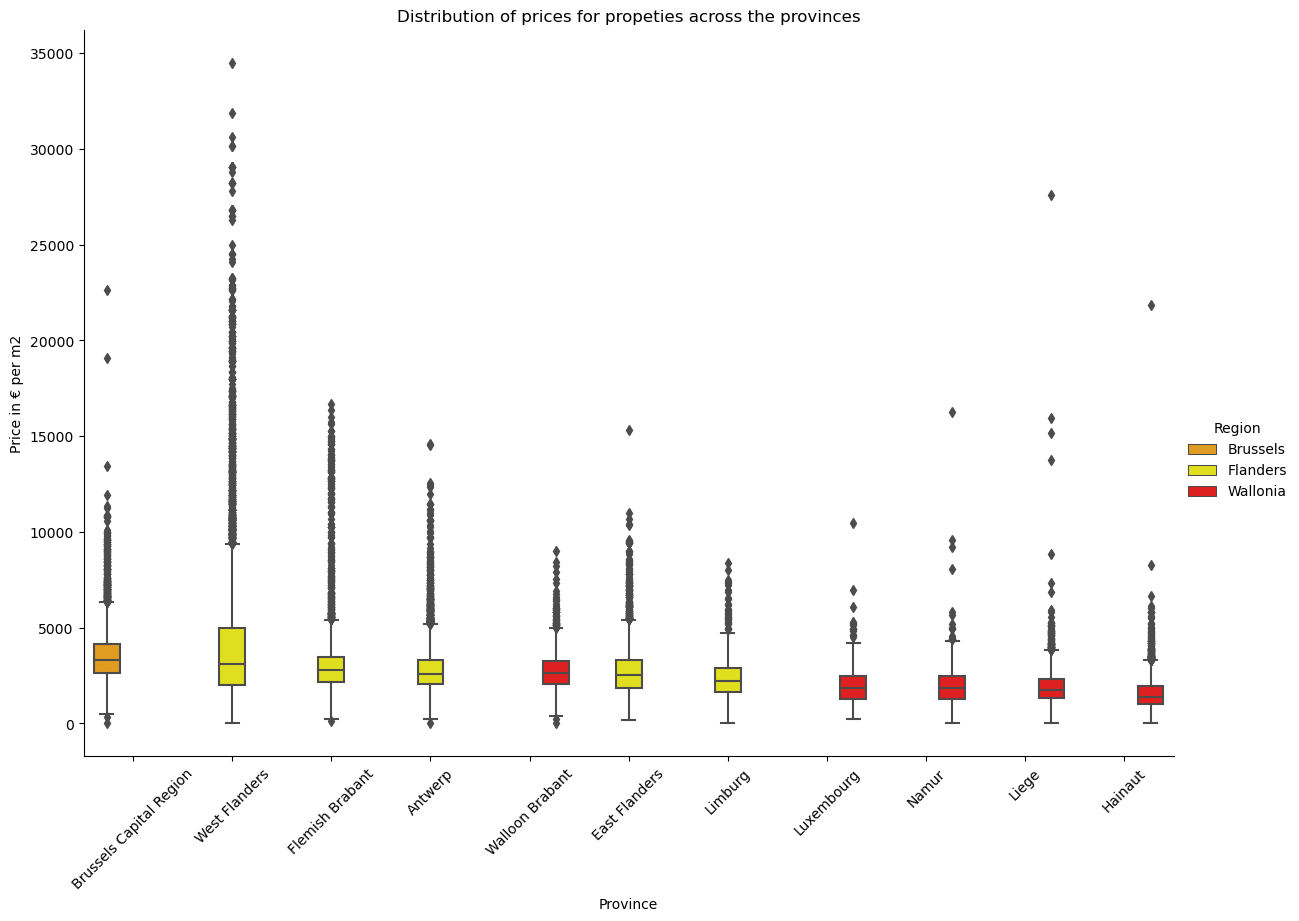

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove outliers
data = data[data['Price_m2'] <= 40000]
data = data[data['Bedroom_Count'] <= 40]

order = ['Brussels Capital Region', 'West Flanders', 'Flemish Brabant', 'Antwerp', 'Walloon Brabant', \
         'East Flanders', 'Limburg', 'Luxembourg', 'Namur', 'Liege', 'Hainaut']
sns.set_palette(['orange', 'yellow', 'red'])
hue_order = ['Brussels', 'Flanders', 'Wallonia']
sns.catplot(x='Province', y='Price_m2', data=data, kind='box', order=order, hue='Region', hue_order=hue_order,\
            height=8, aspect=1.5)
plt.title("Distribution of prices for propeties across the provinces")
plt.ylabel("Price in € per m2")
plt.xticks(rotation=45)
plt.show()

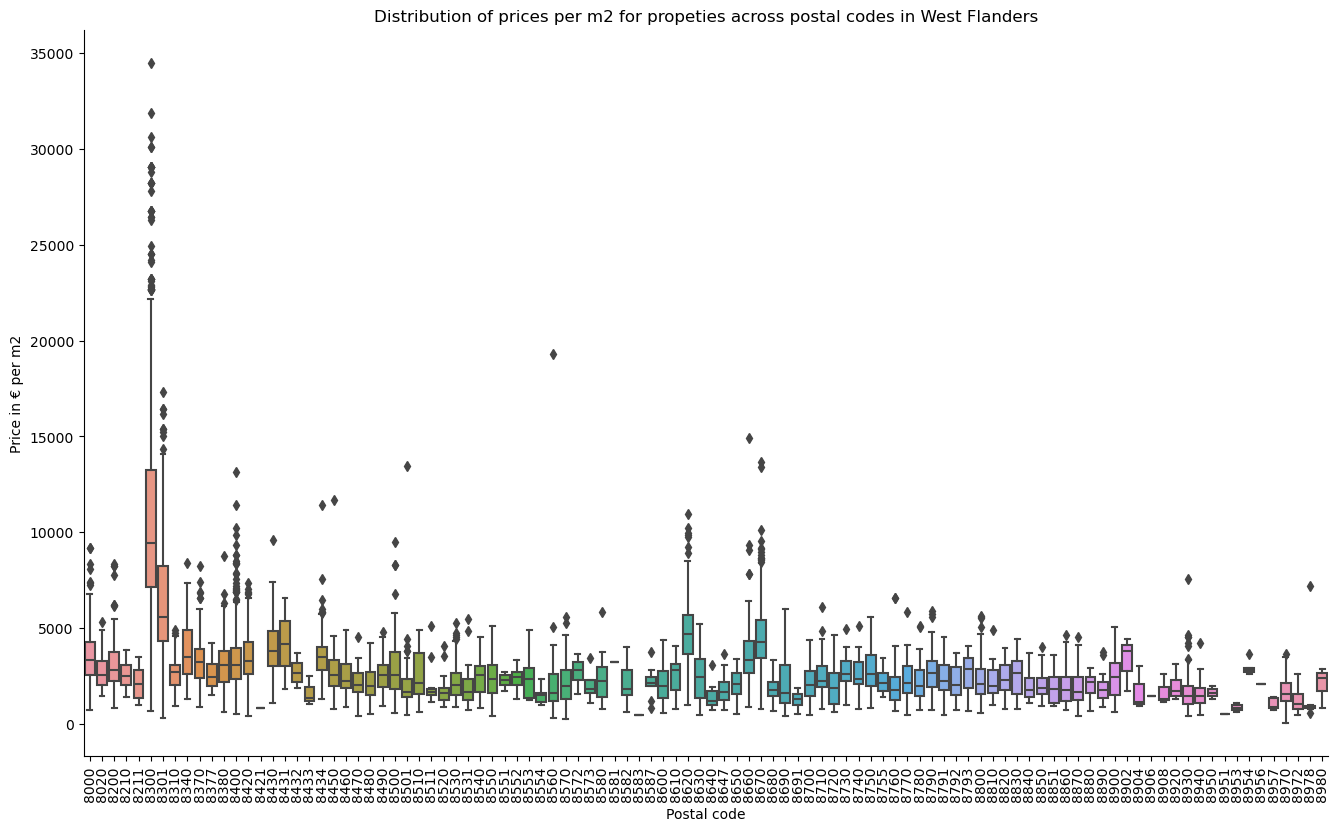

In [11]:
sns.catplot(x='Postal_Code', y='Price_m2', data=data[data['Province']=="West Flanders"], kind='box', \
                height=8, aspect=1.7)
plt.title("Distribution of prices per m2 for propeties across postal codes in West Flanders")
plt.ylabel("Price in € per m2")
plt.xlabel("Postal code")
plt.xticks(rotation=90)
plt.show()

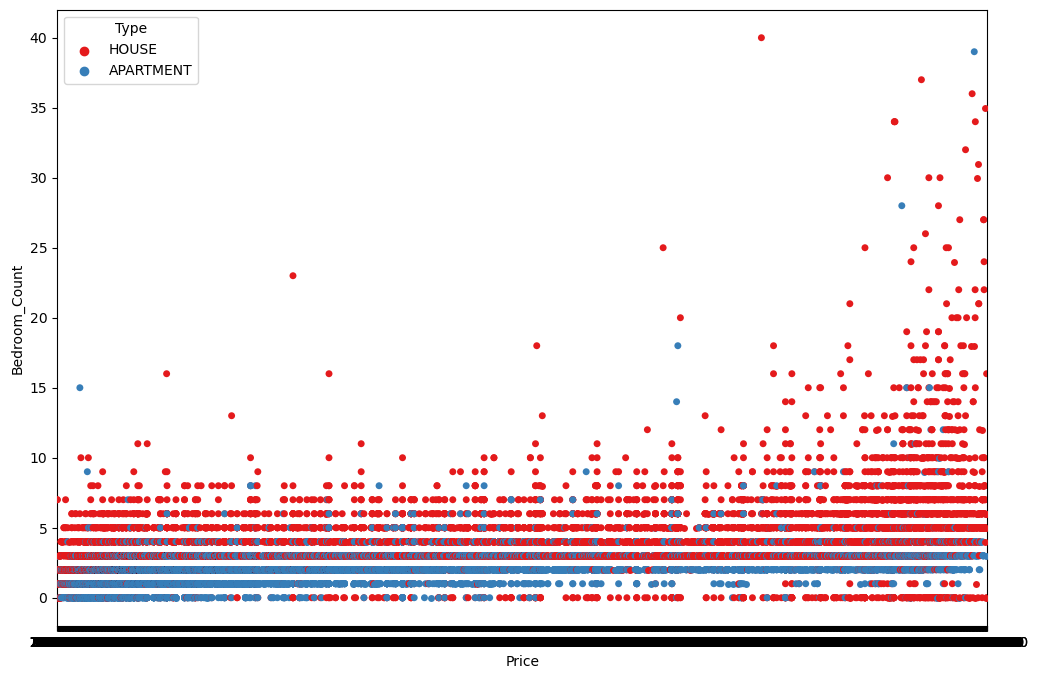

In [13]:
plt.subplots(figsize=(12, 8))
sns.stripplot(x='Price', y='Bedroom_Count', data=data, hue='Type', palette='Set1', jitter=True)
plt.show()

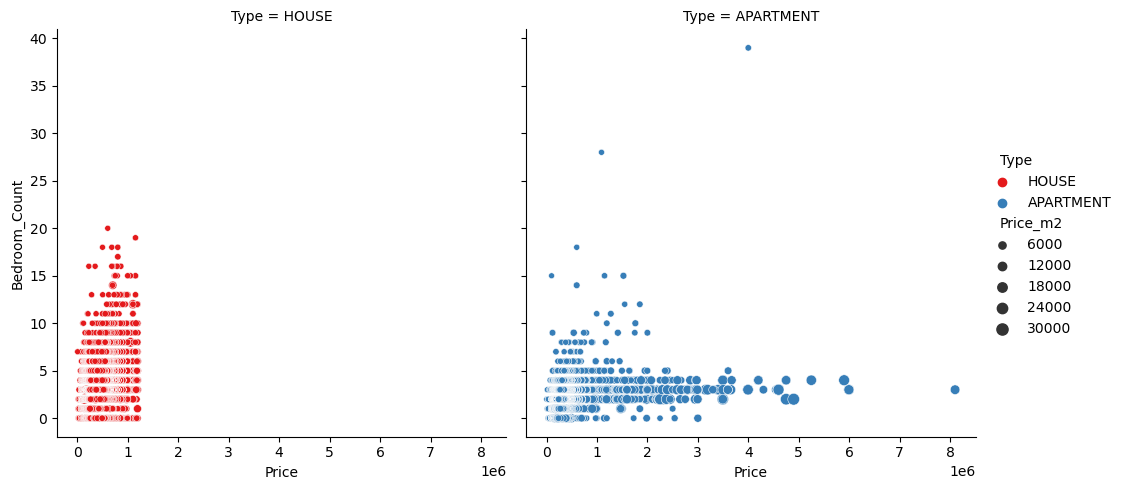

In [19]:
sns.relplot(x='Price', y='Bedroom_Count', data=data, kind='scatter', col='Type', hue='Type', palette='Set1',\
            size='Price_m2')
plt.show()

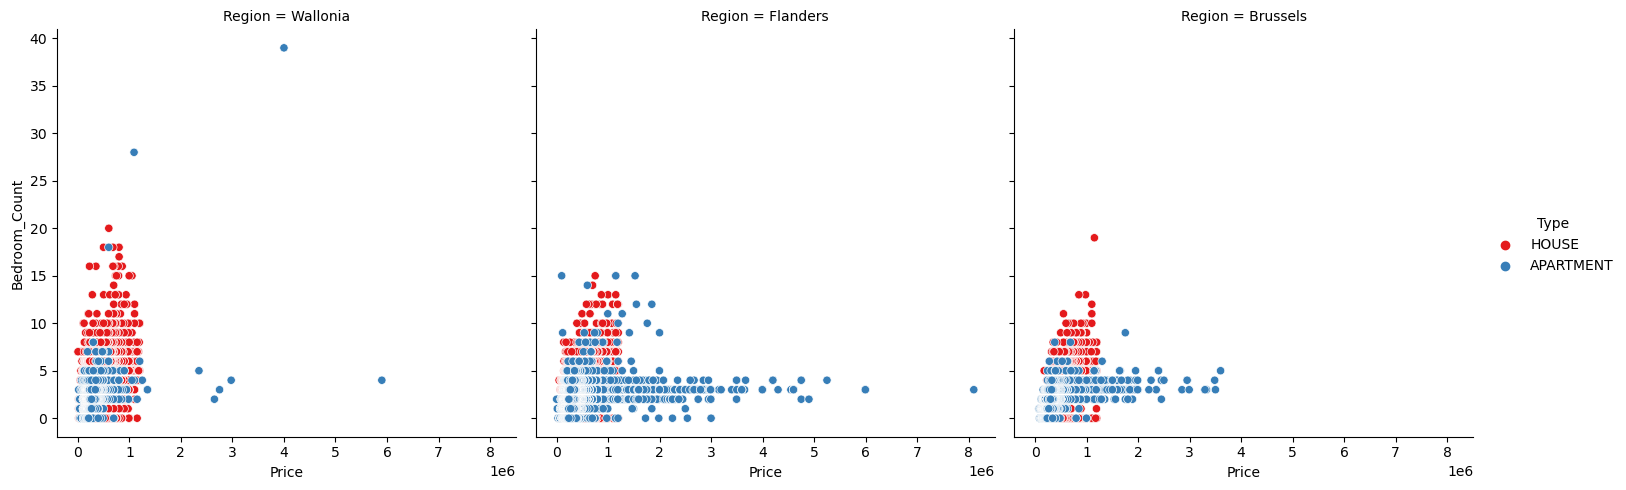

In [23]:
mask = (data['Type'] == 'HOUSE') & ((data['Price'] >= 1200000) | (data['Bedroom_Count'] > 20))
data = data[~mask]

sns.relplot(x='Price', y='Bedroom_Count', data=data, kind='scatter', col='Region', palette='Set1', hue='Type')
plt.show()

In [26]:
# Divide the data into separete datasets for houses and apartments
data_houses = data[data['Type'] == 'HOUSE']
data_apartments = data[data['Type'] == 'APARTMENT']
data_apartments.drop(columns='Land_Surface', inplace=True)
print(data['Type'].value_counts())

Type
HOUSE        25434
APARTMENT    20128
Name: count, dtype: int64


#### Creating a map with data on price per square meter

In [ ]:
# Impost the necessary libraries for creating a map
import geopandas as gpd
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# Preparing the map for houses
houses = data_houses.loc[:, ('ID', 'Postal_Code', 'Price', 'Price_m2', 'Latitude', 'Longitude', 'Region', 'Province')]
houses = houses.dropna(subset=['Latitude', 'Longitude'])
houses = houses.drop_duplicates(subset=['Latitude', 'Longitude'])

houses_mean = pd.concat([houses.groupby(['Postal_Code'])['Price_m2'].mean()],axis=1).reset_index()
house_temp = houses.loc[:, ('Postal_Code', 'Latitude', 'Longitude')]
houses_mean = pd.merge(houses_mean, house_temp, on='Postal_Code', how='inner')
houses_mean.drop_duplicates('Postal_Code', inplace=True)
houses_mean = houses_mean.reset_index(drop=True)

houses.sort_values(by=['Price_m2', 'Postal_Code'], inplace=True)
houses_mean.sort_values(by=['Price_m2', 'Postal_Code'], inplace=True)

# Create a colormap
cmap = cm._colormaps.get_cmap('viridis_r')
# Normalize the colormap to the range of square meter prices
norm = colors.Normalize(vmin=houses['Price_m2'].min(), vmax=houses['Price_m2'].max())
map_houses = folium.Map(location=[50.5039, 4.4699], tiles="cartodb positron", zoom_start=8)

for idx, row in houses.iterrows():
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        # Get the color for the house price using the colormap
        color = colors.to_hex(cmap(norm(row['Price_m2'])))
        # Add a circle marker for each house
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']], 
            radius=3,
            weight=3,
            color=color,
            fill=False,
        ).add_to(map_houses)

map_houses.save('Belgium_houses_map.html')

In [ ]:
# Continuing with map for houses mean price per m2
# Create a colormap
cmap = cm._colormaps.get_cmap('viridis_r')
# Normalize the colormap to the range of square meter prices
norm = colors.Normalize(vmin=houses_mean['Price_m2'].min(), vmax=houses_mean['Price_m2'].max())
map_houses_mean = folium.Map(location=[50.5039, 4.4699], tiles="cartodb positron", zoom_start=7)
for idx, row in houses_mean.iterrows():
    # Get the color for the house price using the colormap
    color = colors.to_hex(cmap(norm(row['Price_m2'])))
    # Add a circle marker for each house
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']], 
        radius=5,
        weight=3,
        color=color,
        fill=False,
    ).add_to(map_houses_mean)

map_houses_mean.save('Belgium_houses_mean_map.html')
#map_houses_mean

In [ ]:
# Preparing the map for apartments
apartments = data_apartments.loc[:, ('ID', 'Postal_Code', 'Price', 'Price_m2', 'Latitude', 'Longitude', 'Region', \
                                     'Province')]
apartments = apartments.dropna(subset=['Latitude', 'Longitude'])
apartments = apartments.drop_duplicates(subset=['Latitude', 'Longitude'])

apartments_mean = pd.concat([apartments.groupby(['Postal_Code'])['Price_m2'].mean()],axis=1).reset_index()
apartments_temp = apartments.loc[:, ('Postal_Code', 'Latitude', 'Longitude')]
apartments_mean = pd.merge(apartments_mean, apartments_temp, on='Postal_Code', how='inner')
apartments_mean.drop_duplicates('Postal_Code', inplace=True)
apartments_mean = apartments_mean.reset_index(drop=True)

apartments.sort_values(by=['Price_m2', 'Postal_Code'], inplace=True)
apartments_mean.sort_values(by=['Price_m2', 'Postal_Code'], inplace=True)

cmap = cm._colormaps.get_cmap('viridis_r')
# Normalize the colormap to the range of square meter prices
norm = colors.Normalize(vmin=apartments['Price_m2'].min(), vmax=apartments['Price_m2'].max())
map_apartments = folium.Map(location=[50.5039, 4.4699], tiles="cartodb positron", zoom_start=7)
for idx, row in apartments.iterrows():
    # Get the color for the house price using the colormap
    color = colors.to_hex(cmap(norm(row['Price_m2'])))
    # Add a circle marker for each house
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']], 
        radius=3,
        weight=3,
        color=color,
        fill=False,
    ).add_to(map_apartments)
map_apartments.save('Belgium_apartments_map.html')

In [ ]:
# Continuing with map for apartments mean price per m2
# Create a colormap
cmap = cm._colormaps.get_cmap('viridis_r')
# Normalize the colormap to the range of square meter prices
norm = colors.Normalize(vmin=apartments_mean['Price_m2'].min(), vmax=apartments_mean['Price_m2'].max())
map_apartments_mean = folium.Map(location=[50.5039, 4.4699], tiles="cartodb positron", zoom_start=7)
for idx, row in apartments_mean.iterrows():
    # Get the color for the house price using the colormap
    color = colors.to_hex(cmap(norm(row['Price_m2'])))
    # Add a circle marker for each house
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']], 
        radius=5,
        weight=3,
        color=color,
        fill=False,
    ).add_to(map_apartments_mean)
map_apartments_mean.save('Belgium_apartments_mean_map.html')

In [ ]:
# Preparing the map for Brussels
brussels = data[(data['Postal_Code'] >= 1000) & (data['Postal_Code'] < 1300)]
brussels = brussels.loc[:, ('ID', 'Postal_Code', 'Price', 'Price_m2', 'Latitude', 'Longitude', 'Region', 'Province')]
brussels = brussels.dropna(subset=['Latitude', 'Longitude'])
brussels = brussels.drop_duplicates(subset=['Latitude', 'Longitude'])

brussels_mean = pd.concat([brussels.groupby(['Postal_Code'])['Price_m2'].median()],axis=1).reset_index()
brussels_temp = brussels.loc[:, ('Postal_Code', 'Latitude', 'Longitude')]
brussels_mean = pd.merge(brussels_mean, brussels_temp, on='Postal_Code', how='inner')
brussels_mean.drop_duplicates('Postal_Code', inplace=True)
brussels_mean = brussels_mean.reset_index(drop=True)

brussels_mean.sort_values(by=['Price_m2', 'Postal_Code'], inplace=True)
    
cmap = cm._colormaps.get_cmap('viridis_r')
# Normalize the colormap to the range of square meter prices
norm = colors.Normalize(vmin=brussels_mean['Price_m2'].min(), vmax=brussels_mean['Price_m2'].max())
brussels_map = folium.Map(location=[50.502639, 4.211499], tiles="cartodb positron", zoom_start=10)
for idx, row in brussels_mean.iterrows():
    # Get the color for the house price using the colormap
    color = colors.to_hex(cmap(norm(row['Price_m2'])))
    # Add a circle marker for each house
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']], 
        radius=7,
        weight=4,
        color=color,
        fill=False).add_to(brussels_map)
brussels_map.save('Brussels_map.html')

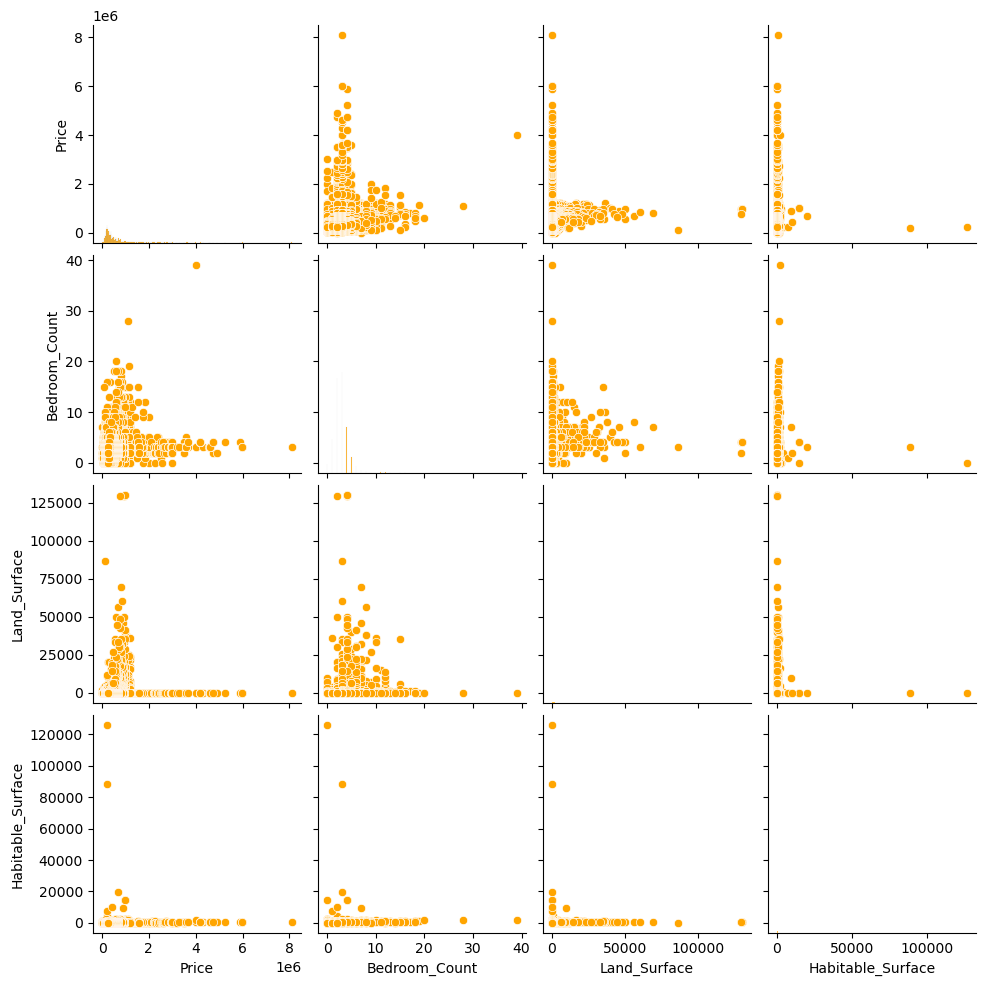

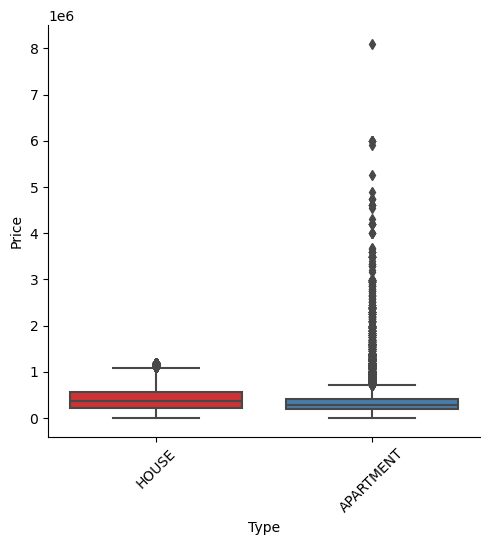

In [28]:
sns.pairplot(data[['Price', 'Bedroom_Count', 'Land_Surface', 'Habitable_Surface']])
plt.show()

# Example: Boxplot to visualize the distribution of 'Price' for different 'Type' of properties
sns.catplot(x='Type', y='Price', data=data, kind='box', palette='Set1')
plt.xticks(rotation=45)
plt.show()

Subtype
APARTMENT       15417
GROUND_FLOOR     1143
DUPLEX           1087
PENTHOUSE         944
FLAT_STUDIO       826
SERVICE_FLAT      280
LOFT              181
KOT               147
TRIPLEX           103
Name: count, dtype: int64


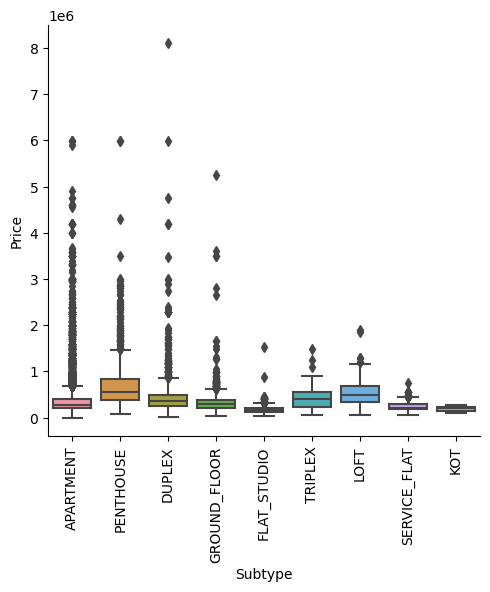

In [29]:
print(data_apartments['Subtype'].value_counts())
sns.catplot(x='Subtype', y='Price', data=data_apartments, kind='box')
plt.xticks(rotation=90)
plt.show()

Subtype
HOUSE                   19379
VILLA                    2219
APARTMENT_BLOCK          1151
MIXED_USE_BUILDING       1000
TOWN_HOUSE                340
EXCEPTIONAL_PROPERTY      327
MANSION                   265
BUNGALOW                  222
COUNTRY_COTTAGE           155
FARMHOUSE                 136
MANOR_HOUSE                90
CHALET                     88
OTHER_PROPERTY             50
CASTLE                     12
Name: count, dtype: int64


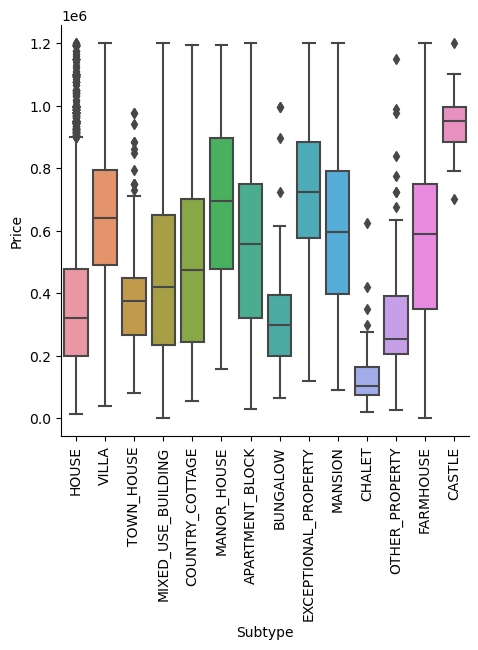

In [30]:
print(data_houses['Subtype'].value_counts())
sns.catplot(x='Subtype', y='Price', data=data_houses, kind='box')
plt.xticks(rotation=90)
plt.show()

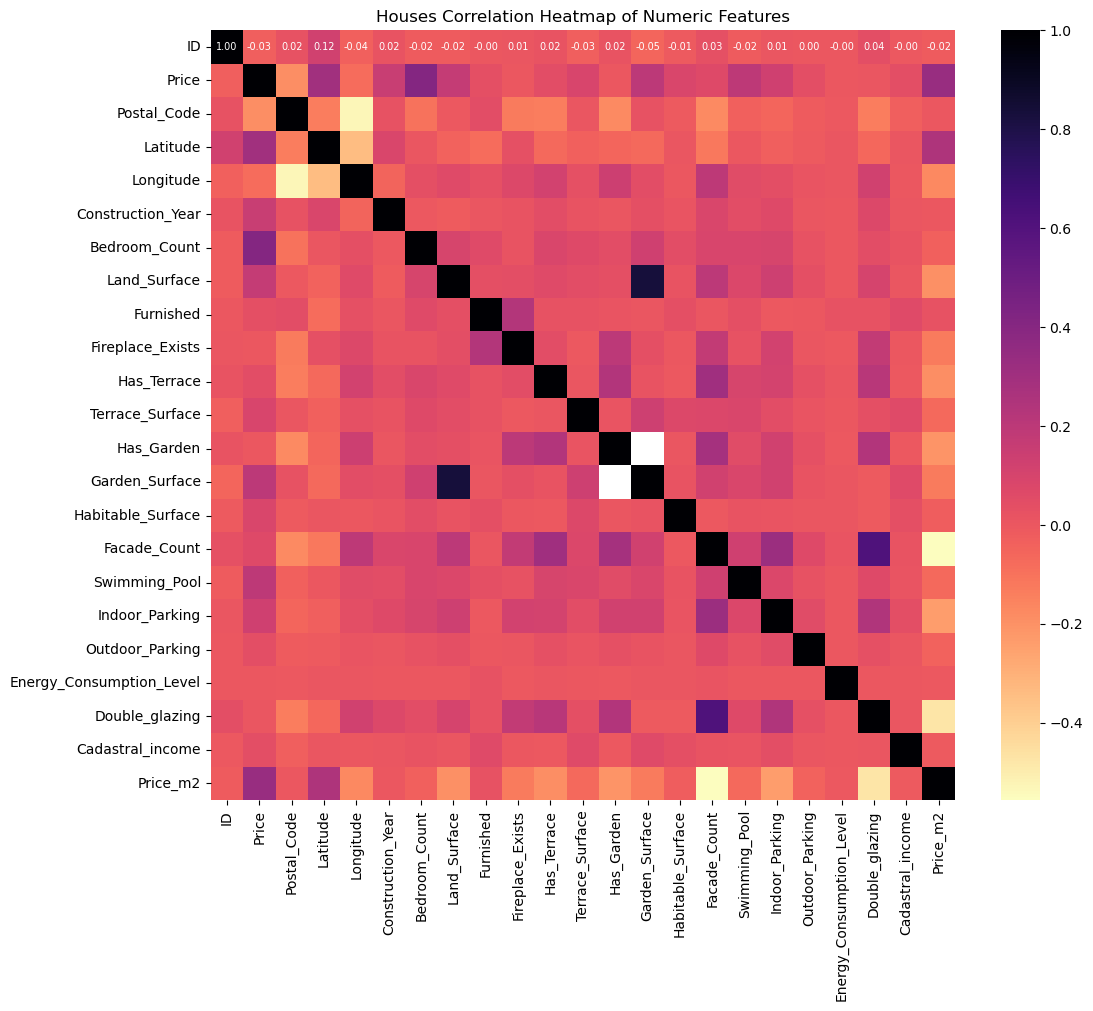

In [31]:
# Select only numeric columns for the heatmap
numeric_data_houses = data_houses.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix_houses = numeric_data_houses.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_houses, annot=True, annot_kws={'size': 7}, fmt=".2f", cmap='magma_r')
plt.title('Houses Correlation Heatmap of Numeric Features')
plt.show()

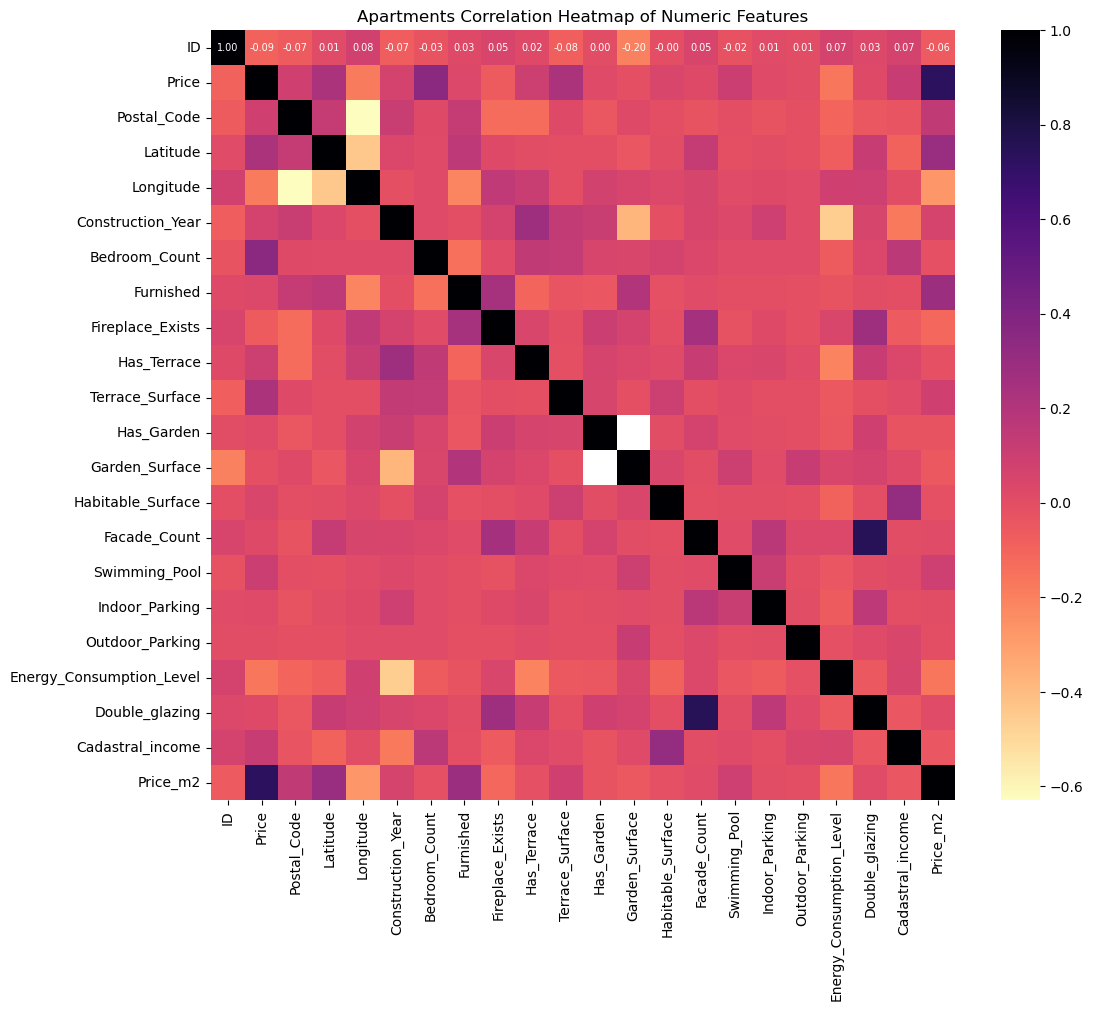

In [32]:
# Select only numeric columns for the heatmap
numeric_data_apartments = data_apartments.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix_apartments = numeric_data_apartments.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_apartments, annot=True, annot_kws={'size': 7}, fmt=".2f", cmap='magma_r')
plt.title('Apartments Correlation Heatmap of Numeric Features')
plt.show()